# Packages

In [ ]:
!pip install utilsforecast coreforecast nixtla statsforecast mlforecast neuralforecast

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from nixtla import NixtlaClient

from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, AutoETS, AutoARIMA

from mlforecast import MLForecast
import xgboost as xgb

from neuralforecast import NeuralForecast
from neuralforecast.auto import AutoNBEATS, AutoNHITS

from utilsforecast.evaluation import evaluate
from utilsforecast.losses import rmse, mae, bias
from utilsforecast.plotting import plot_series


nixtla_client = NixtlaClient(
    api_key= 'nixak-GU4ctXFWmKUcZV3FNQzQkmYAzF5mvytXBSTcY5B8HHTQUdFyC8IevzsadaebAIDUhgUCRxPRwnCzs0LB'
)

# Read in the Data

In [ ]:

df = (
    pd.read_parquet('https://raw.githubusercontent.com/ryaltic/Hotel-Occupancy-Forecast/main/sample_hotels.parquet')
)

otb_df = df.iloc[:, 36:]
otb_df


df = (
    df
  [['unique_id', 'ds','holiday_flag','target_day','target_month','target_year','location_type','hotel_type','y']]
)
df


df = pd.concat([df, otb_df], axis=1)
df

df = pd.get_dummies(df, columns=['holiday_flag', 'target_day','target_month','location_type','hotel_type'], drop_first=True)
display(df.head())
display(df.tail())
df.info()

unique_id         ds  target_year         y    otb_28    otb_29  \
1430   hotel_0 2022-01-01         2022  0.975309  0.296296  0.283951   
1431   hotel_0 2022-01-02         2022  0.493827  0.086420  0.086420   
1432   hotel_0 2022-01-03         2022  0.456790  0.061728  0.061728   
1433   hotel_0 2022-01-04         2022  0.592593  0.111111  0.111111   
1434   hotel_0 2022-01-05         2022  0.530864  0.111111  0.111111   

        otb_30    otb_31    otb_32    otb_33  ...  target_month_Jun  \
1430  0.296296  0.296296  0.283951  0.259259  ...             False   
1431  0.086420  0.086420  0.086420  0.086420  ...             False   
1432  0.061728  0.061728  0.061728  0.061728  ...             False   
1433  0.111111  0.111111  0.098765  0.098765  ...             False   
1434  0.111111  0.111111  0.111111  0.111111  ...             False   

      target_month_Mar  target_month_May  target_month_Nov  target_month_Oct  \
1430             False             False             False             False   
1431             False             False             False             False   
1432             False             False             False             False   
1433             False             False             False             False   
1434             False             False             False             False   

      target_month_Sep  location_type_NonSuburban  \
1430             False                       True   
1431             False                       True   
1432             False                       True   
1433             False                       True   
1434             False                       True   

      hotel_type_Key Central Business District  \
1430                                     False   
1431                                     False   
1432                                     False   
1433                                     False   
1434                                     False   

      hotel_type_Other High Leisure Mix  hotel_type_Resorts & Destinations  
1430                              False                               True  
1431                              False                               True  
1432                              False                               True  
1433                              False                               True  
1434                              False                               True  

[5 rows x 58 columns]

unique_id         ds  target_year         y    otb_28    otb_29  \
298037  hotel_133 2023-06-26         2023  0.983607  0.655738  0.639344   
298038  hotel_133 2023-06-27         2023  0.983607  0.688525  0.688525   
298039  hotel_133 2023-06-28         2023  0.950820  0.622951  0.622951   
298040  hotel_133 2023-06-29         2023  0.918033  0.606557  0.573770   
298041  hotel_133 2023-06-30         2023  0.967213  0.672131  0.622951   

          otb_30    otb_31    otb_32    otb_33  ...  target_month_Jun  \
298037  0.639344  0.622951  0.590164  0.557377  ...              True   
298038  0.672131  0.672131  0.655738  0.622951  ...              True   
298039  0.622951  0.606557  0.622951  0.590164  ...              True   
298040  0.573770  0.573770  0.557377  0.573770  ...              True   
298041  0.606557  0.606557  0.606557  0.573770  ...              True   

        target_month_Mar  target_month_May  target_month_Nov  \
298037             False             False             False   
298038             False             False             False   
298039             False             False             False   
298040             False             False             False   
298041             False             False             False   

        target_month_Oct  target_month_Sep  location_type_NonSuburban  \
298037             False             False                       True   
298038             False             False                       True   
298039             False             False                       True   
298040             False             False                       True   
298041             False             False                       True   

        hotel_type_Key Central Business District  \
298037                                     False   
298038                                     False   
298039                                     False   
298040                                     False   
298041                                     False   

        hotel_type_Other High Leisure Mix  hotel_type_Resorts & Destinations  
298037                              False                               True  
298038                              False                               True  
298039                              False                               True  
298040                              False                               True  
298041                              False                               True  

[5 rows x 58 columns]

<class 'pandas.core.frame.DataFrame'>
Index: 10172 entries, 1430 to 298041
Data columns (total 58 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   unique_id                                 10172 non-null  object        
 1   ds                                        10172 non-null  datetime64[us]
 2   target_year                               10172 non-null  int32         
 3   y                                         10172 non-null  float64       
 4   otb_28                                    10172 non-null  float64       
 5   otb_29                                    10172 non-null  float64       
 6   otb_30                                    10172 non-null  float64       
 7   otb_31                                    10172 non-null  float64       
 8   otb_32                                    10172 non-null  float64       
 9   otb_33                       

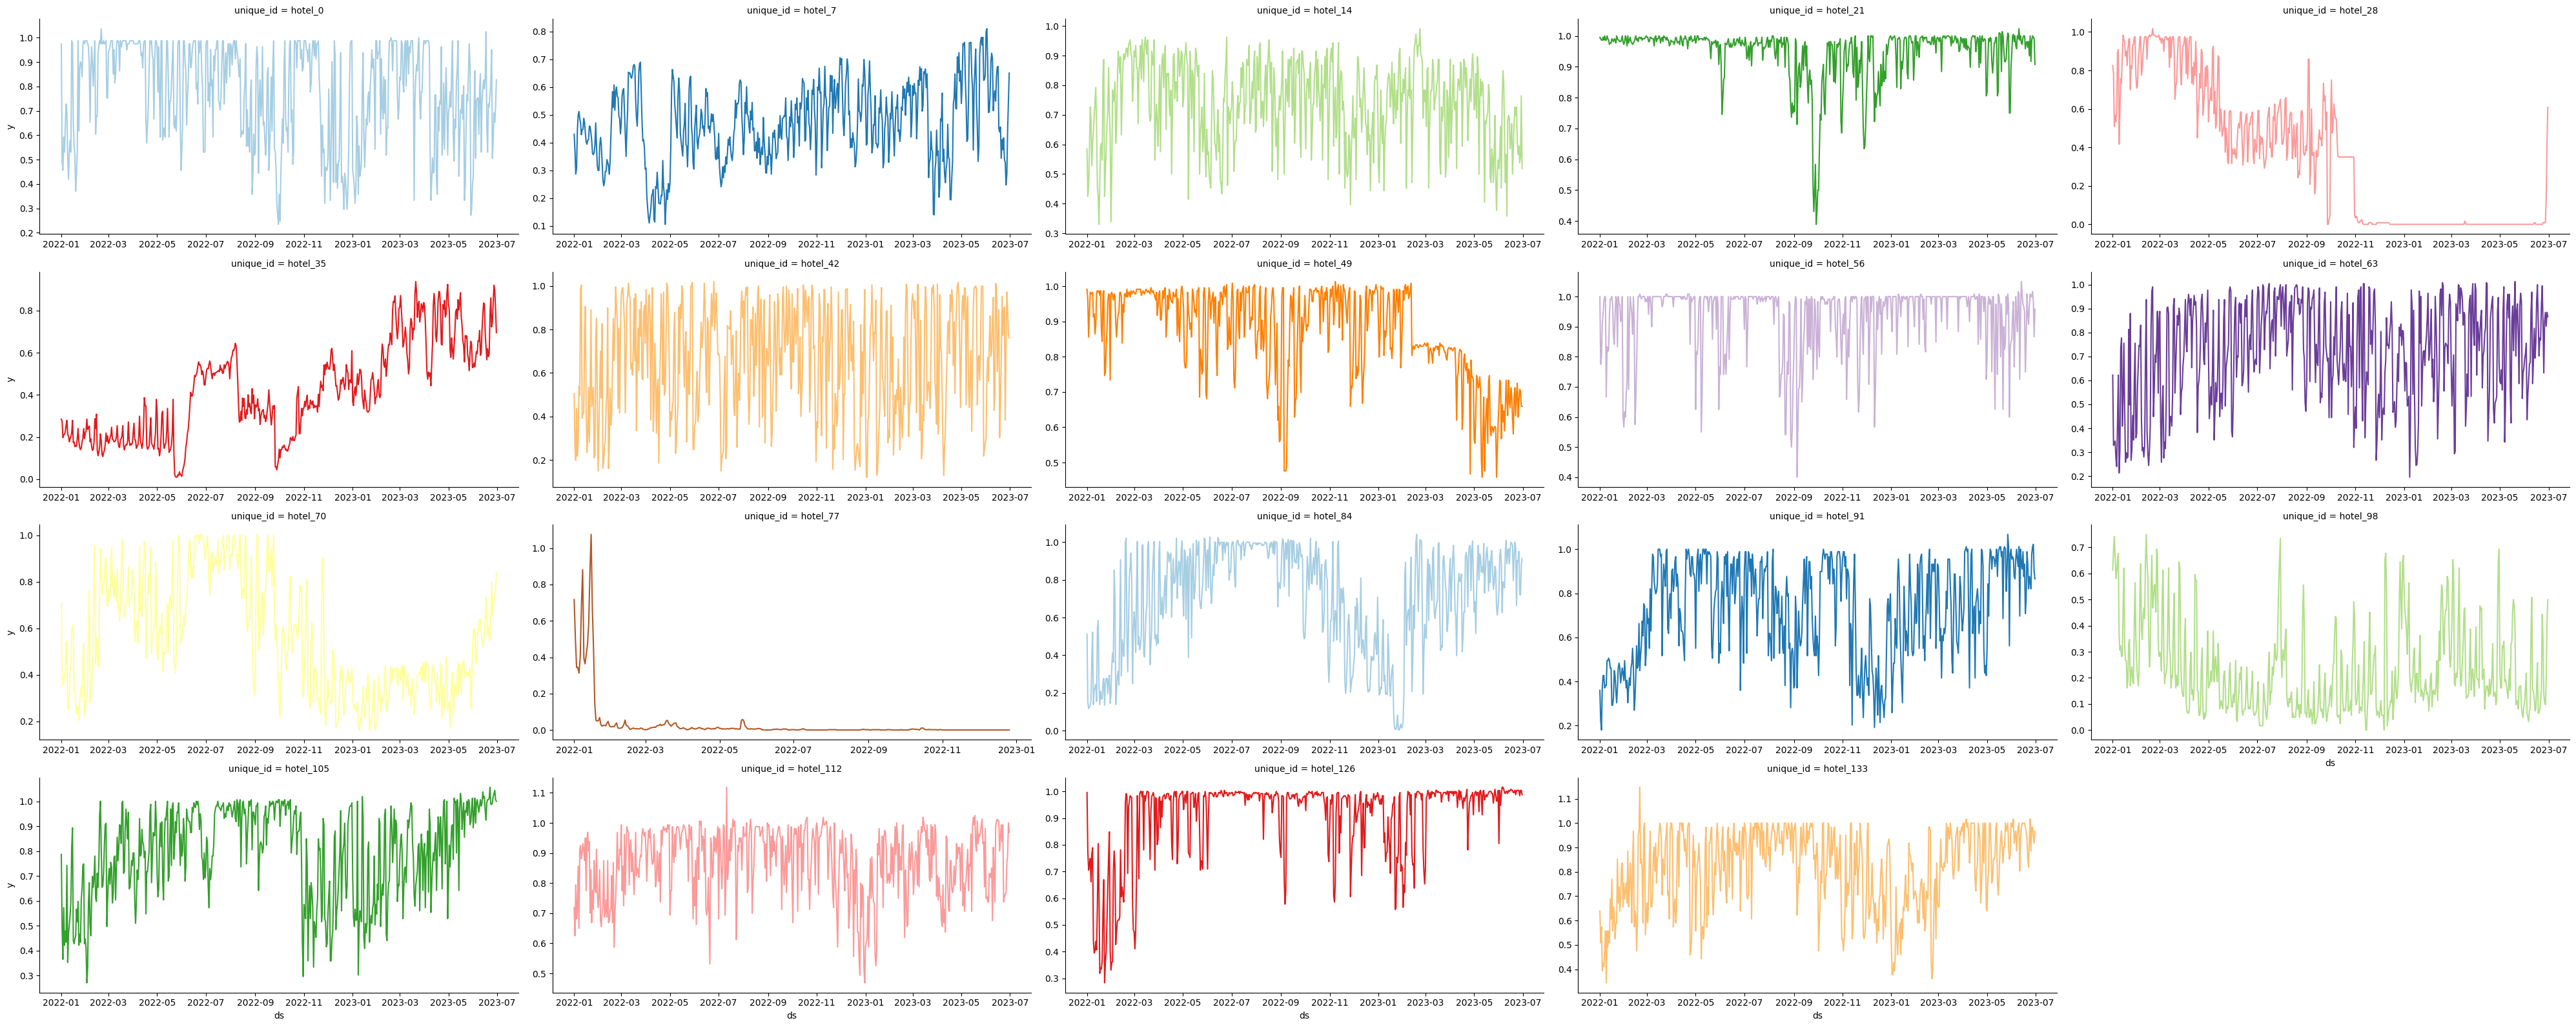

In [ ]:
fig = sns.relplot(
  data=df, x='ds', y='y', kind='line', legend=False, hue='unique_id', col='unique_id', height=4, aspect=2,
  palette='Paired', col_wrap=5,  facet_kws={'sharey': False, 'sharex': False}
)

Removing hotel 77 and hotel 28 as the data is incomplete for those hotels

In [ ]:
df = df.query("unique_id != 'hotel_77' and unique_id != 'hotel_28'")


Updated figure plot without hotel 77 and hotel 28

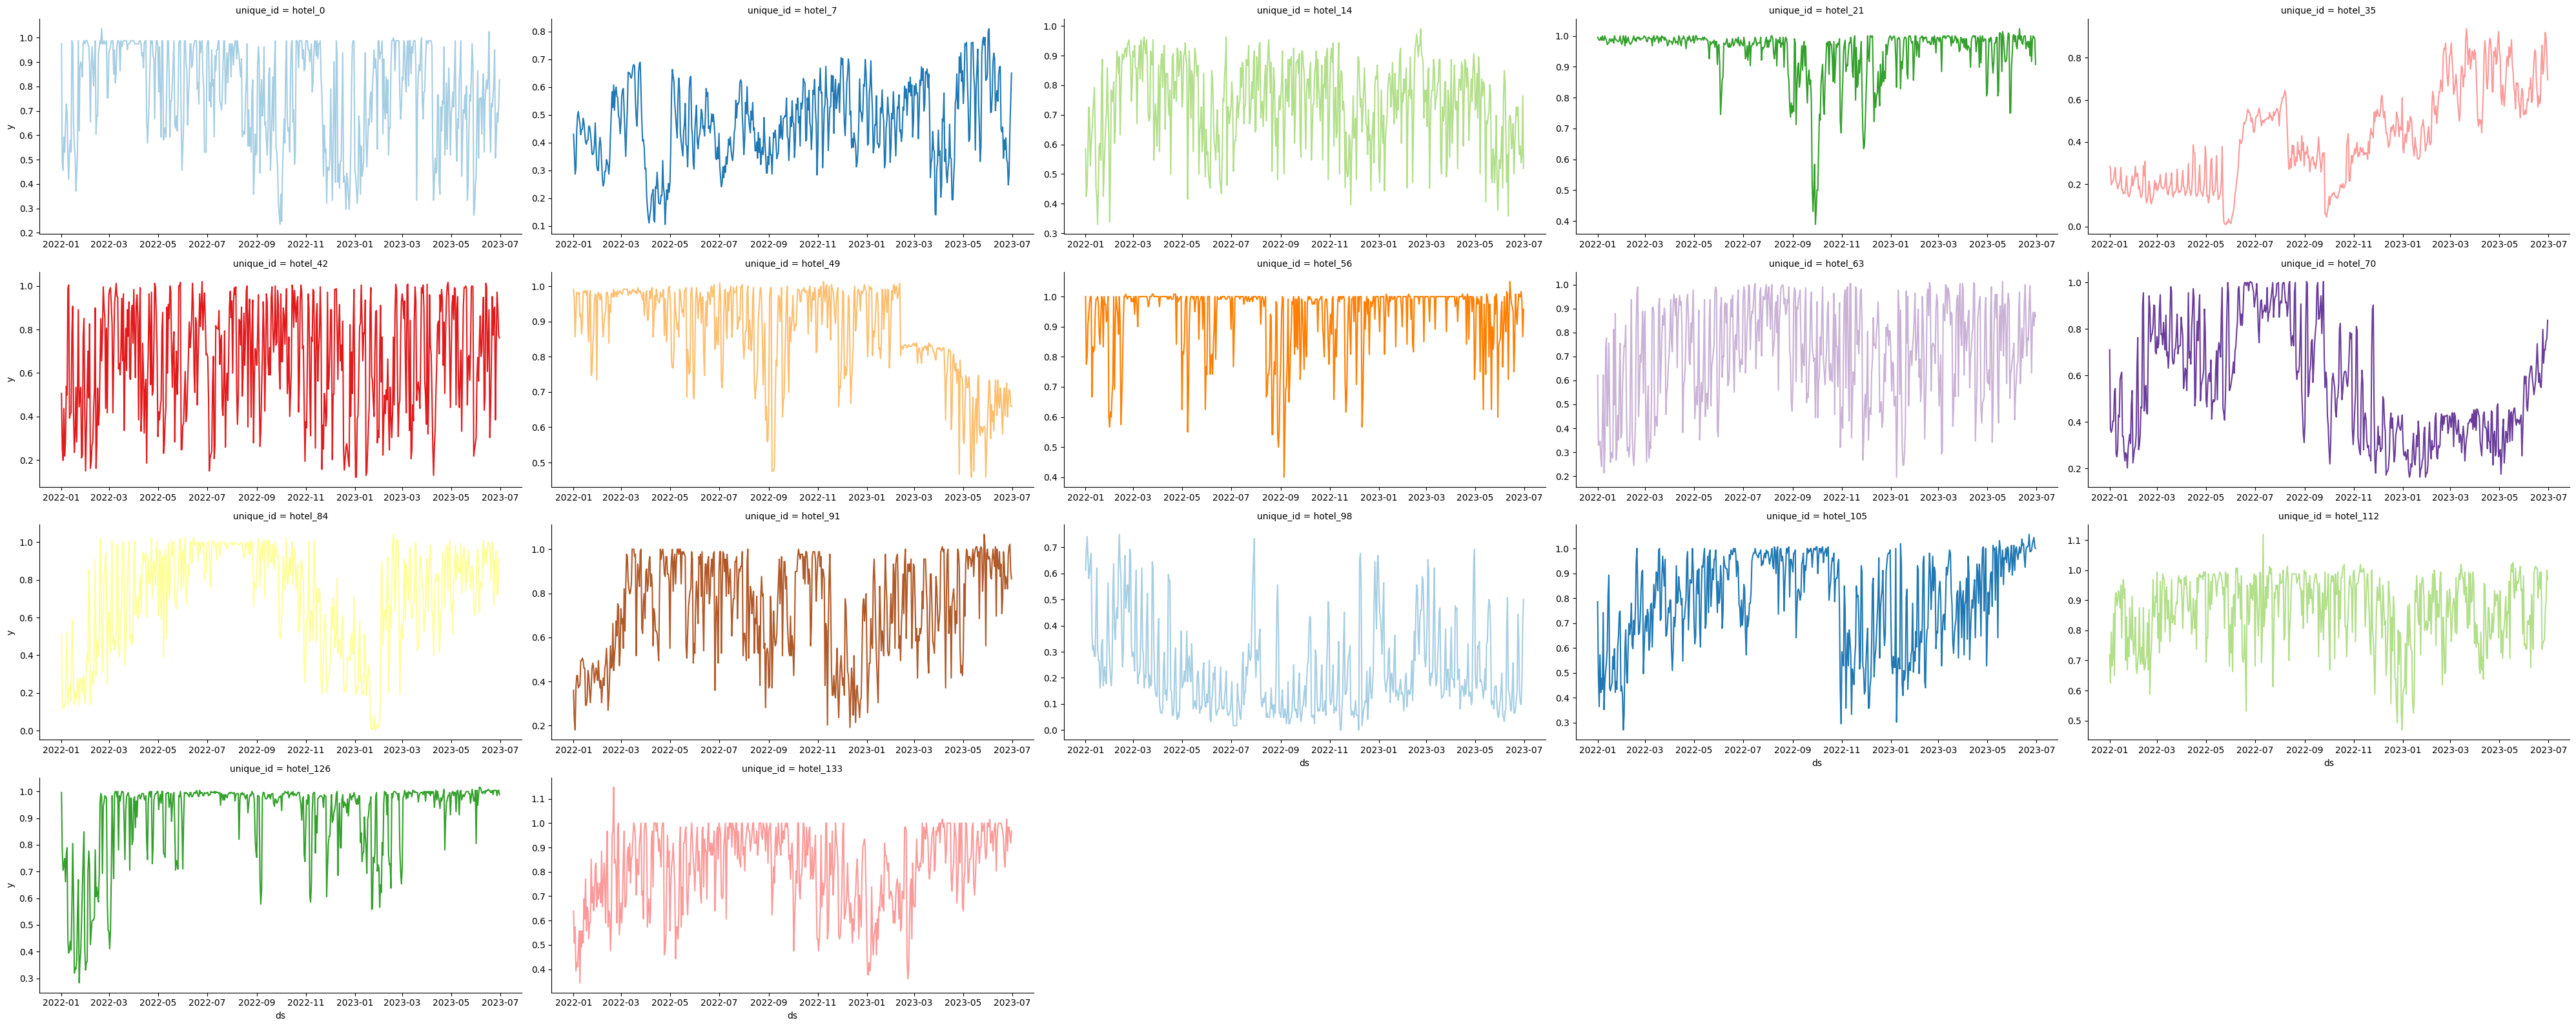

In [ ]:
fig = sns.relplot(
  data=df, x='ds', y='y', kind='line', legend=False, hue='unique_id', col='unique_id', height=4, aspect=2,
  palette='Paired', col_wrap=5,  facet_kws={'sharey': False, 'sharex': False}
)

In [ ]:
train_df = df.query("ds < '2023-06-01'")
test_df = df.query("ds >= '2023-06-01'")
test_df =(
    test_df
    .query("ds <= '2023-06-28'")
    )

# Models

## Baseline Models

In [ ]:
baseline_models = [Naive(),
                   SeasonalNaive(season_length=7),
                   AutoETS()]

sf_base = StatsForecast(
    models = baseline_models,
    freq = 'D',
    n_jobs = -1
    )

cross_validation_base = sf_base.cross_validation(
    h=28,
    df = df[['unique_id','ds','y']].query("ds < '2023-06-01'"),
    step_size = 28,
    n_windows = 5
)

eval_base = evaluate(cross_validation_base, metrics=[rmse, mae, bias], models=['Naive', 'SeasonalNaive', 'AutoETS'])
eval_base
eval_base.to_csv('eval_base.csv', index=False)

## AutoARIMA with Predictors

In [ ]:
autoarima_pred = [AutoARIMA()]

sf_arima_pred = StatsForecast(
    models=autoarima_pred,
    freq="D",
    n_jobs=-1,
)

cross_validation_arima_pred = sf_arima_pred.cross_validation(
    h = 28,
    df = df.query("ds < '2023-06-01'"),
    step_size=28,
    n_windows = 5
)

eval_autoarima_pred = evaluate(cross_validation_arima_pred, metrics=[bias,rmse,mae], models=['AutoARIMA'])
eval_autoarima_pred
eval_autoarima_pred.to_csv('eval_autoarima_pred.csv', index=False)

## XGB model

In [ ]:
xgb_model = {'xgb' : xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)}

mlf = MLForecast(
    models = xgb_model,
    freq = 'D'
)
df = df.query("unique_id != 'hotel_77' and unique_id != 'hotel_28'")
cross_validation_mlf = mlf.cross_validation(
    n_windows = 5,
    step_size=28,
    h = 28,
    static_features=[],
    df = df.query("ds < '2023-06-01'")
    )

display(cross_validation_mlf)

eval_ml = evaluate(
    df = cross_validation_mlf,
    metrics = [bias, rmse, mae],
    models = ['xgb']
)

display(eval_ml)
eval_ml.to_csv('eval_ml.csv', index=False)

unique_id         ds     cutoff         y       xgb
0      hotel_0 2023-01-12 2023-01-11  0.493827  0.628070
1      hotel_0 2023-01-13 2023-01-11  0.790123  0.696087
2      hotel_0 2023-01-14 2023-01-11  0.938272  0.750975
3      hotel_0 2023-01-15 2023-01-11  0.604938  0.636461
4      hotel_0 2023-01-16 2023-01-11  0.469136  0.678750
...        ...        ...        ...       ...       ...
2375  hotel_98 2023-05-27 2023-05-03  0.169355  0.357339
2376  hotel_98 2023-05-28 2023-05-03  0.088710  0.142850
2377  hotel_98 2023-05-29 2023-05-03  0.056452  0.180853
2378  hotel_98 2023-05-30 2023-05-03  0.048387  0.116869
2379  hotel_98 2023-05-31 2023-05-03  0.088710  0.145139

[2380 rows x 5 columns]

unique_id metric       xgb
0     hotel_0   bias  0.018596
1   hotel_105   bias -0.024661
2   hotel_112   bias -0.017354
3   hotel_126   bias -0.088959
4   hotel_133   bias  0.013405
5    hotel_14   bias -0.049328
6    hotel_21   bias -0.021842
7    hotel_35   bias -0.125108
8    hotel_42   bias -0.000758
9    hotel_49   bias  0.090485
10   hotel_56   bias -0.122288
11   hotel_63   bias  0.066576
12    hotel_7   bias  0.046804
13   hotel_70   bias  0.272624
14   hotel_84   bias  0.093384
15   hotel_91   bias -0.059025
16   hotel_98   bias  0.056351
17    hotel_0   rmse  0.133489
18  hotel_105   rmse  0.105441
19  hotel_112   rmse  0.115145
20  hotel_126   rmse  0.160907
21  hotel_133   rmse  0.108961
22   hotel_14   rmse  0.131912
23   hotel_21   rmse  0.045644
24   hotel_35   rmse  0.178768
25   hotel_42   rmse  0.188555
26   hotel_49   rmse  0.124109
27   hotel_56   rmse  0.160212
28   hotel_63   rmse  0.151843
29    hotel_7   rmse  0.128032
30   hotel_70   rmse  0.295269
31   hotel_84   rmse  0.205562
32   hotel_91   rmse  0.171502
33   hotel_98   rmse  0.134797
34    hotel_0    mae  0.111289
35  hotel_105    mae  0.086447
36  hotel_112    mae  0.093528
37  hotel_126    mae  0.120644
38  hotel_133    mae  0.081623
39   hotel_14    mae  0.104698
40   hotel_21    mae  0.036358
41   hotel_35    mae  0.146679
42   hotel_42    mae  0.145708
43   hotel_49    mae  0.105014
44   hotel_56    mae  0.129716
45   hotel_63    mae  0.121863
46    hotel_7    mae  0.094595
47   hotel_70    mae  0.273637
48   hotel_84    mae  0.134791
49   hotel_91    mae  0.138587
50   hotel_98    mae  0.109909

## TimeGPT

In [ ]:
timegpt_cv_df = nixtla_client.cross_validation(
    df = df.query("ds < '2023-06-01'"),
    h=28,
    freq = 'D',
    n_windows= 5,
    step_size = 28
 )

display(timegpt_cv_df)

timegpt_cv_eval = evaluate(
    df = timegpt_cv_df,
    metrics = [bias, mae, rmse],
    models = ['TimeGPT']
)
display(timegpt_cv_eval)
timegpt_cv_eval.to_csv('timegpt_cv_eval.csv', index=False)

unique_id         ds     cutoff         y   TimeGPT
0      hotel_0 2023-01-12 2023-01-11  0.493827  0.494344
1      hotel_0 2023-01-13 2023-01-11  0.790123  0.664061
2      hotel_0 2023-01-14 2023-01-11  0.938272  0.781975
3      hotel_0 2023-01-15 2023-01-11  0.604938  0.570766
4      hotel_0 2023-01-16 2023-01-11  0.469136  0.626505
...        ...        ...        ...       ...       ...
2375  hotel_98 2023-05-27 2023-05-03  0.169355  0.335431
2376  hotel_98 2023-05-28 2023-05-03  0.088710  0.167737
2377  hotel_98 2023-05-29 2023-05-03  0.056452  0.161212
2378  hotel_98 2023-05-30 2023-05-03  0.048387  0.124469
2379  hotel_98 2023-05-31 2023-05-03  0.088710  0.143475

[2380 rows x 5 columns]

unique_id metric   TimeGPT
0     hotel_0   bias  0.036939
1   hotel_105   bias  0.006136
2   hotel_112   bias  0.012416
3   hotel_126   bias  0.004850
4   hotel_133   bias  0.006248
5    hotel_14   bias  0.001913
6    hotel_21   bias  0.013125
7    hotel_35   bias -0.077605
8    hotel_42   bias  0.025641
9    hotel_49   bias  0.082007
10   hotel_56   bias  0.012832
11   hotel_63   bias -0.003679
12    hotel_7   bias  0.031299
13   hotel_70   bias  0.031564
14   hotel_84   bias  0.051184
15   hotel_91   bias -0.020255
16   hotel_98   bias  0.021368
17    hotel_0    mae  0.118992
18  hotel_105    mae  0.090013
19  hotel_112    mae  0.083734
20  hotel_126    mae  0.069348
21  hotel_133    mae  0.095580
22   hotel_14    mae  0.106015
23   hotel_21    mae  0.027336
24   hotel_35    mae  0.114491
25   hotel_42    mae  0.159981
26   hotel_49    mae  0.092005
27   hotel_56    mae  0.056558
28   hotel_63    mae  0.129364
29    hotel_7    mae  0.088779
30   hotel_70    mae  0.096651
31   hotel_84    mae  0.133572
32   hotel_91    mae  0.150285
33   hotel_98    mae  0.094051
34    hotel_0   rmse  0.152214
35  hotel_105   rmse  0.111934
36  hotel_112   rmse  0.104694
37  hotel_126   rmse  0.100997
38  hotel_133   rmse  0.124421
39   hotel_14   rmse  0.129875
40   hotel_21   rmse  0.043683
41   hotel_35   rmse  0.140759
42   hotel_42   rmse  0.193371
43   hotel_49   rmse  0.115090
44   hotel_56   rmse  0.077260
45   hotel_63   rmse  0.159130
46    hotel_7   rmse  0.112683
47   hotel_70   rmse  0.118187
48   hotel_84   rmse  0.186036
49   hotel_91   rmse  0.182634
50   hotel_98   rmse  0.120479

## Neural Models

In [ ]:
Neural_models = [AutoNBEATS(h=28),
                 AutoNHITS(h=28)]

nf = NeuralForecast(
    models = Neural_models,
    freq = 'D'
)


cross_validation_nf = nf.cross_validation(
    n_windows = 5,
    step_size=28,
    df = df.query("ds < '2023-06-01'")
    )

display(cross_validation_nf)

eval_nf = evaluate(
    df = cross_validation_nf,
    metrics = [bias, rmse, mae],
    models = ['AutoNBEATS', 'AutoNHITS']
)

display(eval_nf)
eval_nf.to_csv('eval_nf.csv', index=False)

2025-08-19 00:45:23,472	INFO worker.py:1927 -- Started a local Ray instance.
2025-08-19 00:45:25,050	INFO tune.py:253 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `Tuner(...)`.


+--------------------------------------------------------------------+
| Configuration for experiment     _train_tune_2025-08-19_00-45-20   |
+--------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator             |
| Scheduler                        FIFOScheduler                     |
| Number of trials                 10                                |
+--------------------------------------------------------------------+

View detailed results here: /root/ray_results/_train_tune_2025-08-19_00-45-20
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2025-08-19_00-45-20_581974_4361/artifacts/2025-08-19_00-45-25/_train_tune_2025-08-19_00-45-20/driver_artifacts`


(_train_tune pid=14205) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=14205) Seed set to 16
(_train_tune pid=14205) GPU available: True (cuda), used: True
(_train_tune pid=14205) TPU available: False, using: 0 TPU cores
(_train_tune pid=14205) HPU available: False, using: 0 HPUs
(_train_tune pid=14205) 2025-08-19 00:45:37.649368: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=14205) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=14205) E0000 00:00:1755564337.951854   14292 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuD

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 70.84it/s, v_num=0, train_loss_step=0.712, train_loss_epoch=0.760]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 65.25it/s, v_num=0, train_loss_step=0.657, train_loss_epoch=0.747, valid_loss=0.147]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 65.36it/s, v_num=0, train_loss_step=0.635, train_loss_epoch=0.648, valid_loss=0.166]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 52.12it/s, v_num=0, train_loss_step=0.502, train_loss_epoch=0.541, valid_loss=0.166]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 38.44it/s, v_num=0, train_loss_step=0.530, train_loss_epoch=0.479, valid_loss=0.162]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 599: 100%|██████████| 1/1 [00:00<00:00, 61.25it/s, v_num=0, train_loss_step=0

(_train_tune pid=14205) `Trainer.fit` stopped: `max_steps=1000` reached.
(_train_tune pid=14424) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=14424) Seed set to 8
(_train_tune pid=14424) GPU available: True (cuda), used: True
(_train_tune pid=14424) TPU available: False, using: 0 TPU cores
(_train_tune pid=14424) HPU available: False, using: 0 HPUs
(_train_tune pid=14424) 2025-08-19 00:46:15.034660: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=14424) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=14424) E0000 00:00:1755564375.068826   14509 cuda_dnn.cc:8579] Unable 

Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 75.22it/s, v_num=0, train_loss_step=0.0522, train_loss_epoch=0.0572]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 82.94it/s, v_num=0, train_loss_step=0.0121, train_loss_epoch=0.012, valid_loss=0.174]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 79.76it/s, v_num=0, train_loss_step=0.00847, train_loss_epoch=0.00834, valid_loss=0.175]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 58.24it/s, v_num=0, train_loss_step=0.00448, train_loss_epoch=0.00359, valid_loss=0.174]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 72.51it/s, v_num=0, train_loss_step=0.00293, train_loss_epoch=0.00295, valid_loss=0.174]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 32.15it/s, v_num=0, train_loss_step=0.00293, train_loss_epoch=0.00293, va

(_train_tune pid=14424) `Trainer.fit` stopped: `max_steps=500` reached.
(_train_tune pid=14572) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=14572) Seed set to 16
(_train_tune pid=14572) GPU available: True (cuda), used: True
(_train_tune pid=14572) TPU available: False, using: 0 TPU cores
(_train_tune pid=14572) HPU available: False, using: 0 HPUs
(_train_tune pid=14572) 2025-08-19 00:46:38.207906: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=14572) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=14572) E0000 00:00:1755564398.257043   14654 cuda_dnn.cc:8579] Unable 

Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 66.24it/s, v_num=0, train_loss_step=0.896, train_loss_epoch=0.905]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 62.29it/s, v_num=0, train_loss_step=0.808, train_loss_epoch=0.768, valid_loss=0.144]
(_train_tune pid=14572) 
Validation: |          | 0/? [00:00<?, ?it/s]
(_train_tune pid=14572) 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=14572) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 80.99it/s, v_num=0, train_loss_step=0.675, train_loss_epoch=0.721, valid_loss=0.147]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 80.49it/s, v_num=0, train_loss_step=0.640, train_loss_epoch=0.619, valid_loss=0.158]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 50.23it/s, v_num=0, train_loss_step=0.644, train_loss_epoch=0.623, valid_loss=0.163]
Validation: |          | 0/? [00:00<?, ?it

(_train_tune pid=14572) `Trainer.fit` stopped: `max_steps=1000` reached.
(_train_tune pid=14752) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=14752) Seed set to 3
(_train_tune pid=14752) GPU available: True (cuda), used: True
(_train_tune pid=14752) TPU available: False, using: 0 TPU cores
(_train_tune pid=14752) HPU available: False, using: 0 HPUs
(_train_tune pid=14752) 2025-08-19 00:47:09.815824: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=14752) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=14752) E0000 00:00:1755564429.841107   14830 cuda_dnn.cc:8579] Unable 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 75.18it/s, v_num=0, train_loss_step=0.653, train_loss_epoch=0.689]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 233.68it/s]
(_train_tune pid=14752) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 62.41it/s, v_num=0, train_loss_step=0.446, train_loss_epoch=0.423, valid_loss=0.159]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 62.58it/s, v_num=0, train_loss_step=0.340, train_loss_epoch=0.328, valid_loss=0.161]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 182.23it/s]
(_train_tune pid=14752) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 61.77it/s, v_num=0, train_loss_step=0.267, train_loss_epoch=0.259, valid_loss=0.171]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_t

(_train_tune pid=14752) `Trainer.fit` stopped: `max_steps=500` reached.
(_train_tune pid=14895) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=14895) Seed set to 2
(_train_tune pid=14895) GPU available: True (cuda), used: True
(_train_tune pid=14895) TPU available: False, using: 0 TPU cores
(_train_tune pid=14895) HPU available: False, using: 0 HPUs
(_train_tune pid=14895) 2025-08-19 00:47:32.131571: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=14895) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=14895) E0000 00:00:1755564452.178501   14966 cuda_dnn.cc:8579] Unable t

Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 78.65it/s, v_num=0, train_loss_step=1.900, train_loss_epoch=1.920]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 228.50it/s]
(_train_tune pid=14895) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 81.35it/s, v_num=0, train_loss_step=1.440, train_loss_epoch=1.390, valid_loss=0.151]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 192.02it/s]
(_train_tune pid=14895) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 72.84it/s, v_num=0, train_loss_step=1.280, train_loss_epoch=1.240, valid_loss=0.166]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 75.27it/s, v_num=0, train_loss_step=1.050, train_loss_epoch=1.080, valid_loss=0.171]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 49.74it/s, v_num=0, train_loss_step=0.985, train_loss_epoch=1.050, vali

(_train_tune pid=14895) `Trainer.fit` stopped: `max_steps=500` reached.
(_train_tune pid=15029) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=15029) Seed set to 14
(_train_tune pid=15029) GPU available: True (cuda), used: True
(_train_tune pid=15029) TPU available: False, using: 0 TPU cores
(_train_tune pid=15029) HPU available: False, using: 0 HPUs
(_train_tune pid=15029) 2025-08-19 00:47:54.466794: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=15029) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=15029) E0000 00:00:1755564474.493834   15108 cuda_dnn.cc:8579] Unable 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 57.91it/s, v_num=0, train_loss_step=6.18e+10, train_loss_epoch=2.62e+10]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 109.95it/s]
(_train_tune pid=15029) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 81.76it/s, v_num=0, train_loss_step=4.78e+8, train_loss_epoch=5.8e+8, valid_loss=8.78e+8]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 85.74it/s, v_num=0, train_loss_step=1.6e+10, train_loss_epoch=1.78e+10, valid_loss=2.31e+7] 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 85.27it/s, v_num=0, train_loss_step=1.09e+9, train_loss_epoch=1.31e+9, valid_loss=3.51e+7]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 85.24it/s, v_num=0, train_loss_step=6.91e+7, train_loss_epoch=2.54e+8, valid_loss=3.96e+6]
V

(_train_tune pid=15029) `Trainer.fit` stopped: `max_steps=1000` reached.
(_train_tune pid=15200) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=15200) Seed set to 9
(_train_tune pid=15200) GPU available: True (cuda), used: True
(_train_tune pid=15200) TPU available: False, using: 0 TPU cores
(_train_tune pid=15200) HPU available: False, using: 0 HPUs
(_train_tune pid=15200) 2025-08-19 00:48:23.709856: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=15200) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=15200) E0000 00:00:1755564503.735897   15275 cuda_dnn.cc:8579] Unable 

Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 74.46it/s, v_num=0, train_loss_step=0.574, train_loss_epoch=0.580]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 74.04it/s, v_num=0, train_loss_step=0.349, train_loss_epoch=0.361, valid_loss=0.153]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 77.49it/s, v_num=0, train_loss_step=0.296, train_loss_epoch=0.296, valid_loss=0.164]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 78.28it/s, v_num=0, train_loss_step=0.239, train_loss_epoch=0.228, valid_loss=0.169]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 497:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.211, train_loss_epoch=0.211, valid_loss=0.166]


(_train_tune pid=15200) `Trainer.fit` stopped: `max_steps=500` reached.


Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 74.99it/s, v_num=0, train_loss_step=0.214, train_loss_epoch=0.213, valid_loss=0.166]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 33.88it/s, v_num=0, train_loss_step=0.214, train_loss_epoch=0.214, valid_loss=0.167]


(_train_tune pid=15336) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=15336) Seed set to 12
(_train_tune pid=15336) GPU available: True (cuda), used: True
(_train_tune pid=15336) TPU available: False, using: 0 TPU cores
(_train_tune pid=15336) HPU available: False, using: 0 HPUs
(_train_tune pid=15336) 2025-08-19 00:48:46.930508: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=15336) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=15336) E0000 00:00:1755564526.964074   15418 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuD

Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 64.89it/s, v_num=0, train_loss_step=0.124, train_loss_epoch=0.132]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 78.76it/s, v_num=0, train_loss_step=0.121, train_loss_epoch=0.122, valid_loss=0.186]
Validation: |          | 0/? [00:00<?, ?it/s]
(_train_tune pid=15336) 
Validation DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 175.99it/s]
(_train_tune pid=15336) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 91.88it/s, v_num=0, train_loss_step=0.129, train_loss_epoch=0.120, valid_loss=0.178]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 86.79it/s, v_num=0, train_loss_step=0.127, train_loss_epoch=0.116, valid_loss=0.179]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 82.65it/s, v_num=0, train_loss_step=0.120, train_loss_epoch=0.119, valid_loss=0.178]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 1

(_train_tune pid=15336) `Trainer.fit` stopped: `max_steps=500` reached.
(_train_tune pid=15476) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=15476) Seed set to 7
(_train_tune pid=15476) GPU available: True (cuda), used: True
(_train_tune pid=15476) TPU available: False, using: 0 TPU cores
(_train_tune pid=15476) HPU available: False, using: 0 HPUs
(_train_tune pid=15476) 2025-08-19 00:49:08.826922: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=15476) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=15476) E0000 00:00:1755564548.851858   15556 cuda_dnn.cc:8579] Unable t

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 76.56it/s, v_num=0, train_loss_step=1.130, train_loss_epoch=1.090]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 75.90it/s, v_num=0, train_loss_step=0.983, train_loss_epoch=1.180, valid_loss=0.140]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 56.48it/s, v_num=0, train_loss_step=1.030, train_loss_epoch=0.957, valid_loss=0.142]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 63.59it/s, v_num=0, train_loss_step=1.050, train_loss_epoch=0.950, valid_loss=0.144]
Validation: |          | 0/? [00:00<?, ?it/s]
(_train_tune pid=15476) 
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 48.10it/s, v_num=0, train_loss_step=0.921, train_loss_epoch=0.897, valid_loss=0.149]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 599: 100%|██████████| 1/1 [00:00<00:00, 77.31it/s, v

(_train_tune pid=15476) `Trainer.fit` stopped: `max_steps=1000` reached.
(_train_tune pid=15652) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=15652) Seed set to 5
(_train_tune pid=15652) GPU available: True (cuda), used: True
(_train_tune pid=15652) TPU available: False, using: 0 TPU cores
(_train_tune pid=15652) HPU available: False, using: 0 HPUs
(_train_tune pid=15652) 2025-08-19 00:49:39.917466: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=15652) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=15652) E0000 00:00:1755564579.942735   15727 cuda_dnn.cc:8579] Unable 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 68.63it/s, v_num=0, train_loss_step=354.0, train_loss_epoch=135.0]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 78.43it/s, v_num=0, train_loss_step=70.90, train_loss_epoch=76.60, valid_loss=25.70]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 84.94it/s, v_num=0, train_loss_step=128.0, train_loss_epoch=187.0, valid_loss=5.110]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 77.68it/s, v_num=0, train_loss_step=37.30, train_loss_epoch=35.90, valid_loss=6.440]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 482:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=46.20, train_loss_epoch=46.20, valid_loss=2.930]


2025-08-19 00:49:51,685	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/_train_tune_2025-08-19_00-45-20' in 0.0101s.


Epoch 498:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=32.80, train_loss_epoch=32.80, valid_loss=2.930]


(_train_tune pid=15652) `Trainer.fit` stopped: `max_steps=500` reached.
INFO:lightning_fabric.utilities.seed:Seed set to 16
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs



Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 85.51it/s, v_num=0, train_loss_step=24.70, train_loss_epoch=48.50, valid_loss=2.930]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 36.64it/s, v_num=0, train_loss_step=24.70, train_loss_epoch=24.70, valid_loss=2.900]


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | eval 
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.7 M  | train
-------------------------------------------------------
2.7 M     Trainable params
9.6 K     Non-trainable params
2.7 M     Total params
10.939    Total estimated model params size (MB)
30        Modules in train mode
1         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1000` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

+--------------------------------------------------------------------+
| Configuration for experiment     _train_tune_2025-08-19_00-50-25   |
+--------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator             |
| Scheduler                        FIFOScheduler                     |
| Number of trials                 10                                |
+--------------------------------------------------------------------+

View detailed results here: /root/ray_results/_train_tune_2025-08-19_00-50-25
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2025-08-19_00-45-20_581974_4361/artifacts/2025-08-19_00-50-25/_train_tune_2025-08-19_00-50-25/driver_artifacts`


(_train_tune pid=15929) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=15929) Seed set to 6
(_train_tune pid=15929) GPU available: True (cuda), used: True
(_train_tune pid=15929) TPU available: False, using: 0 TPU cores
(_train_tune pid=15929) HPU available: False, using: 0 HPUs
(_train_tune pid=15929) 2025-08-19 00:50:40.833261: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=15929) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=15929) E0000 00:00:1755564640.876685   16026 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 46.80it/s, v_num=0, train_loss_step=1.25e+11, train_loss_epoch=1.31e+11]
(_train_tune pid=15929) 
Validation: |          | 0/? [00:00<?, ?it/s]
(_train_tune pid=15929) 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=15929) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 36.81it/s, v_num=0, train_loss_step=1.6e+11, train_loss_epoch=1.62e+11, valid_loss=1.18e+11] 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 56.19it/s, v_num=0, train_loss_step=5.65e+10, train_loss_epoch=5.99e+10, valid_loss=1.49e+11]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 55.40it/s, v_num=0, train_loss_step=1.01e+8, train_loss_epoch=6.29e+7, valid_loss=5.14e+10]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 55.52it/s, v_num=0, train_loss_step=7.52e+7, train_loss_epoch=5.51e+7, valid_loss=6.52e+7]
Valid

(_train_tune pid=15929) `Trainer.fit` stopped: `max_steps=1400.0` reached.
(_train_tune pid=16186) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=16186) Seed set to 15
(_train_tune pid=16186) GPU available: True (cuda), used: True
(_train_tune pid=16186) TPU available: False, using: 0 TPU cores
(_train_tune pid=16186) HPU available: False, using: 0 HPUs
(_train_tune pid=16186) 2025-08-19 00:51:26.580318: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=16186) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=16186) E0000 00:00:1755564686.608155   16261 cuda_dnn.cc:8579] Unab

Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 59.35it/s, v_num=0, train_loss_step=0.186, train_loss_epoch=0.189]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 73.79it/s, v_num=0, train_loss_step=0.0649, train_loss_epoch=0.070, valid_loss=0.189]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 231.13it/s]
(_train_tune pid=16186) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 72.50it/s, v_num=0, train_loss_step=0.0582, train_loss_epoch=0.0561, valid_loss=0.188]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 123.49it/s]
(_train_tune pid=16186) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 74.06it/s, v_num=0, train_loss_step=0.0292, train_loss_epoch=0.0278, valid_loss=0.189]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 209.21it/s]
(_train_tune pid=16186) 
Epoch 499: 100%

(_train_tune pid=16186) `Trainer.fit` stopped: `max_steps=500.0` reached.
(_train_tune pid=16327) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=16327) Seed set to 3
(_train_tune pid=16327) GPU available: True (cuda), used: True
(_train_tune pid=16327) TPU available: False, using: 0 TPU cores
(_train_tune pid=16327) HPU available: False, using: 0 HPUs
(_train_tune pid=16327) 2025-08-19 00:51:49.881291: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=16327) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=16327) E0000 00:00:1755564709.908877   16404 cuda_dnn.cc:8579] Unable

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 76.85it/s, v_num=0, train_loss_step=5.08e+5, train_loss_epoch=68.50]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 59.53it/s, v_num=0, train_loss_step=1.56e+4, train_loss_epoch=5.4e+4, valid_loss=557.0]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 50.27it/s, v_num=0, train_loss_step=1.52e+4, train_loss_epoch=6.5e+4, valid_loss=3.26e+4]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 130.19it/s]
(_train_tune pid=16327) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 76.63it/s, v_num=0, train_loss_step=1.35e+3, train_loss_epoch=3.94e+3, valid_loss=5.73e+4]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 253.22it/s]
(_train_tune pid=16327) 
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 73.3

(_train_tune pid=16327) `Trainer.fit` stopped: `max_steps=1000.0` reached.
(_train_tune pid=16498) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=16498) Seed set to 10
(_train_tune pid=16498) GPU available: True (cuda), used: True
(_train_tune pid=16498) TPU available: False, using: 0 TPU cores
(_train_tune pid=16498) HPU available: False, using: 0 HPUs
(_train_tune pid=16498) 2025-08-19 00:52:21.320007: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=16498) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=16498) E0000 00:00:1755564741.346836   16580 cuda_dnn.cc:8579] Unab

Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 79.13it/s, v_num=0, train_loss_step=0.0832, train_loss_epoch=0.0933]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 87.94it/s, v_num=0, train_loss_step=0.0676, train_loss_epoch=0.0643, valid_loss=0.161]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 92.28it/s, v_num=0, train_loss_step=0.0465, train_loss_epoch=0.0447, valid_loss=0.154]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 92.03it/s, v_num=0, train_loss_step=0.0363, train_loss_epoch=0.0346, valid_loss=0.150]
(_train_tune pid=16498) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=16498) 
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 93.88it/s, v_num=0, train_loss_step=0.0277, train_loss_epoch=0.0314, valid_loss=0.150]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 599: 

(_train_tune pid=16498) `Trainer.fit` stopped: `max_steps=800.0` reached.
(_train_tune pid=16653) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=16653) Seed set to 4
(_train_tune pid=16653) GPU available: True (cuda), used: True
(_train_tune pid=16653) TPU available: False, using: 0 TPU cores
(_train_tune pid=16653) HPU available: False, using: 0 HPUs
(_train_tune pid=16653) 2025-08-19 00:52:47.767188: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=16653) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=16653) E0000 00:00:1755564767.793200   16739 cuda_dnn.cc:8579] Unable

Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 71.15it/s, v_num=0, train_loss_step=0.156, train_loss_epoch=0.149]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 79.62it/s, v_num=0, train_loss_step=0.128, train_loss_epoch=0.124, valid_loss=0.211]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 61.68it/s, v_num=0, train_loss_step=0.115, train_loss_epoch=0.120, valid_loss=0.178]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 87.41it/s, v_num=0, train_loss_step=0.117, train_loss_epoch=0.112, valid_loss=0.177]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 93.98it/s, v_num=0, train_loss_step=0.115, train_loss_epoch=0.122, valid_loss=0.170]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 599: 100%|██████████| 1/1 [00:00<00:00, 78.47it/s, v_num=0, train_loss_step=0.120, train_loss_epoch=0.117, valid_loss=0.170]
Val

(_train_tune pid=16653) `Trainer.fit` stopped: `max_steps=800.0` reached.


(_train_tune pid=16653) 
Epoch 799: 100%|██████████| 1/1 [00:00<00:00, 27.13it/s, v_num=0, train_loss_step=0.107, train_loss_epoch=0.107, valid_loss=0.162]


(_train_tune pid=16813) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=16813) Seed set to 12
(_train_tune pid=16813) GPU available: True (cuda), used: True
(_train_tune pid=16813) TPU available: False, using: 0 TPU cores
(_train_tune pid=16813) HPU available: False, using: 0 HPUs
(_train_tune pid=16813) 2025-08-19 00:53:13.329430: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=16813) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=16813) E0000 00:00:1755564793.357408   16889 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuD

Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 83.95it/s, v_num=0, train_loss_step=0.780, train_loss_epoch=0.771]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 87.90it/s, v_num=0, train_loss_step=0.414, train_loss_epoch=0.408, valid_loss=0.175]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 214.74it/s]
(_train_tune pid=16813) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 60.13it/s, v_num=0, train_loss_step=0.262, train_loss_epoch=0.246, valid_loss=0.178]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 67.73it/s, v_num=0, train_loss_step=0.176, train_loss_epoch=0.171, valid_loss=0.180]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 80.41it/s, v_num=0, train_loss_step=0.101, train_loss_epoch=0.0995, valid_loss=0.181] 
(_train_tune pid=16813) 
Validation: |          | 0/? [00:00<?, ?it/s]
(_train_tu

(_train_tune pid=16813) `Trainer.fit` stopped: `max_steps=1300.0` reached.
(_train_tune pid=17002) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=17002) Seed set to 13
(_train_tune pid=17002) GPU available: True (cuda), used: True
(_train_tune pid=17002) TPU available: False, using: 0 TPU cores
(_train_tune pid=17002) HPU available: False, using: 0 HPUs
(_train_tune pid=17002) 2025-08-19 00:53:47.832698: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=17002) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=17002) E0000 00:00:1755564827.858819   17083 cuda_dnn.cc:8579] Unab

Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 84.99it/s, v_num=0, train_loss_step=0.119, train_loss_epoch=0.116]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 70.83it/s, v_num=0, train_loss_step=0.0792, train_loss_epoch=0.0686, valid_loss=0.174]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 33.97it/s, v_num=0, train_loss_step=0.0327, train_loss_epoch=0.0321, valid_loss=0.171]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 69.84it/s, v_num=0, train_loss_step=0.029, train_loss_epoch=0.0304, valid_loss=0.168] 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 79.07it/s, v_num=0, train_loss_step=0.0167, train_loss_epoch=0.0179, valid_loss=0.167]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 599: 100%|██████████| 1/1 [00:00<00:00, 89.15it/s, v_num=0, train_loss_step=0.0204, train_loss_epoch=0.0171, valid_loss=

(_train_tune pid=17002) `Trainer.fit` stopped: `max_steps=600.0` reached.
(_train_tune pid=17149) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=17149) Seed set to 10
(_train_tune pid=17149) GPU available: True (cuda), used: True
(_train_tune pid=17149) TPU available: False, using: 0 TPU cores
(_train_tune pid=17149) HPU available: False, using: 0 HPUs
(_train_tune pid=17149) 2025-08-19 00:54:11.846301: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=17149) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=17149) E0000 00:00:1755564851.872132   17224 cuda_dnn.cc:8579] Unabl

Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 54.15it/s, v_num=0, train_loss_step=0.275, train_loss_epoch=0.273]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 84.81it/s, v_num=0, train_loss_step=0.118, train_loss_epoch=0.130, valid_loss=0.192]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 87.30it/s, v_num=0, train_loss_step=0.0941, train_loss_epoch=0.103, valid_loss=0.190]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 26.28it/s, v_num=0, train_loss_step=0.054, train_loss_epoch=0.051, valid_loss=0.191]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 72.22it/s, v_num=0, train_loss_step=0.047, train_loss_epoch=0.0458, valid_loss=0.189] 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 599: 100%|██████████| 1/1 [00:00<00:00, 80.41it/s, v_num=0, train_loss_step=0.0462, train_loss_epoch=0.050, valid_loss=0.189]

(_train_tune pid=17149) `Trainer.fit` stopped: `max_steps=1000.0` reached.
(_train_tune pid=17320) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=17320) Seed set to 4
(_train_tune pid=17320) GPU available: True (cuda), used: True
(_train_tune pid=17320) TPU available: False, using: 0 TPU cores
(_train_tune pid=17320) HPU available: False, using: 0 HPUs
(_train_tune pid=17320) 2025-08-19 00:54:41.861555: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=17320) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=17320) E0000 00:00:1755564881.887628   17396 cuda_dnn.cc:8579] Unabl

Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 71.54it/s, v_num=0, train_loss_step=46.10, train_loss_epoch=72.30]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 37.46it/s, v_num=0, train_loss_step=37.70, train_loss_epoch=17.00, valid_loss=84.60]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 45.47it/s, v_num=0, train_loss_step=22.10, train_loss_epoch=22.70, valid_loss=24.00]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 82.16it/s, v_num=0, train_loss_step=101.0, train_loss_epoch=42.30, valid_loss=3.280]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 83.69it/s, v_num=0, train_loss_step=46.10, train_loss_epoch=20.70, valid_loss=159.0]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 599: 100%|██████████| 1/1 [00:00<00:00, 83.91it/s, v_num=0, train_loss_step=40.50, train_loss_epoch=26.00, valid_loss=72.80]
Val

(_train_tune pid=17320) `Trainer.fit` stopped: `max_steps=1300.0` reached.
(_train_tune pid=17508) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=17508) Seed set to 17
(_train_tune pid=17508) GPU available: True (cuda), used: True
(_train_tune pid=17508) TPU available: False, using: 0 TPU cores
(_train_tune pid=17508) HPU available: False, using: 0 HPUs
(_train_tune pid=17508) 2025-08-19 00:55:16.554575: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=17508) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=17508) E0000 00:00:1755564916.593113   17590 cuda_dnn.cc:8579] Unab

Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 72.85it/s, v_num=0, train_loss_step=0.110, train_loss_epoch=0.112]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 76.17it/s, v_num=0, train_loss_step=0.103, train_loss_epoch=0.105, valid_loss=0.143]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 75.61it/s, v_num=0, train_loss_step=0.0988, train_loss_epoch=0.0988, valid_loss=0.147]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 70.11it/s, v_num=0, train_loss_step=0.0956, train_loss_epoch=0.0962, valid_loss=0.151]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 47.18it/s, v_num=0, train_loss_step=0.0903, train_loss_epoch=0.0902, valid_loss=0.154]
(_train_tune pid=17508) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 599: 100%|██████████| 1/1 [00:00<00:00, 74.95it/s, v_num=0, train_loss_step=0.0905, train_loss_ep

(_train_tune pid=17508) `Trainer.fit` stopped: `max_steps=1400.0` reached.
2025-08-19 00:55:43,792	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/_train_tune_2025-08-19_00-50-25' in 0.0102s.
INFO:lightning_fabric.utilities.seed:Seed set to 10
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | eval 
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.4 M  | train
-------------

Epoch 1399: 100%|██████████| 1/1 [00:00<00:00, 72.70it/s, v_num=0, train_loss_step=0.0795, train_loss_epoch=0.0788, valid_loss=0.168]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 1399: 100%|██████████| 1/1 [00:00<00:00, 34.50it/s, v_num=0, train_loss_step=0.0795, train_loss_epoch=0.0795, valid_loss=0.170]



Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=800.0` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

unique_id         ds     cutoff  AutoNBEATS  AutoNHITS         y
0      hotel_0 2023-01-12 2023-01-11    0.371235   0.589798  0.493827
1      hotel_0 2023-01-13 2023-01-11    0.669127   0.359787  0.790123
2      hotel_0 2023-01-14 2023-01-11    0.831504   0.394503  0.938272
3      hotel_0 2023-01-15 2023-01-11    0.443607   0.506451  0.604938
4      hotel_0 2023-01-16 2023-01-11    0.530756   0.463991  0.469136
...        ...        ...        ...         ...        ...       ...
2375  hotel_98 2023-05-27 2023-05-03    0.450118   0.091463  0.169355
2376  hotel_98 2023-05-28 2023-05-03    0.150096   0.055952  0.088710
2377  hotel_98 2023-05-29 2023-05-03    0.204296   0.064067  0.056452
2378  hotel_98 2023-05-30 2023-05-03    0.262582   0.061649  0.048387
2379  hotel_98 2023-05-31 2023-05-03    0.261869   0.043888  0.088710

[2380 rows x 6 columns]

unique_id metric  AutoNBEATS  AutoNHITS
0     hotel_0   bias   -0.046569   0.074610
1   hotel_105   bias   -0.107728   0.010492
2   hotel_112   bias   -0.052094  -0.023030
3   hotel_126   bias   -0.021588   0.038295
4   hotel_133   bias   -0.086621  -0.023562
5    hotel_14   bias   -0.046272   0.059236
6    hotel_21   bias   -0.038653   0.016401
7    hotel_35   bias   -0.073320  -0.104392
8    hotel_42   bias   -0.015045   0.144142
9    hotel_49   bias    0.027983   0.090378
10   hotel_56   bias    0.003816   0.037031
11   hotel_63   bias   -0.042830   0.031165
12    hotel_7   bias    0.038164   0.033957
13   hotel_70   bias   -0.028730  -0.092012
14   hotel_84   bias   -0.131928  -0.041946
15   hotel_91   bias   -0.111552   0.040683
16   hotel_98   bias   -0.023812  -0.093625
17    hotel_0   rmse    0.227308   0.275594
18  hotel_105   rmse    0.243121   0.158704
19  hotel_112   rmse    0.128596   0.149030
20  hotel_126   rmse    0.108986   0.118511
21  hotel_133   rmse    0.255406   0.145935
22   hotel_14   rmse    0.179947   0.166842
23   hotel_21   rmse    0.129260   0.057019
24   hotel_35   rmse    0.145764   0.186932
25   hotel_42   rmse    0.289454   0.346342
26   hotel_49   rmse    0.099265   0.137064
27   hotel_56   rmse    0.081064   0.092700
28   hotel_63   rmse    0.205289   0.244940
29    hotel_7   rmse    0.136329   0.178450
30   hotel_70   rmse    0.125129   0.175571
31   hotel_84   rmse    0.278954   0.269675
32   hotel_91   rmse    0.254962   0.239256
33   hotel_98   rmse    0.230621   0.176742
34    hotel_0    mae    0.179861   0.211544
35  hotel_105    mae    0.192525   0.118964
36  hotel_112    mae    0.109845   0.120382
37  hotel_126    mae    0.076355   0.071959
38  hotel_133    mae    0.203819   0.108856
39   hotel_14    mae    0.142837   0.130291
40   hotel_21    mae    0.074717   0.036374
41   hotel_35    mae    0.119424   0.154876
42   hotel_42    mae    0.234001   0.277288
43   hotel_49    mae    0.076799   0.112851
44   hotel_56    mae    0.056927   0.050326
45   hotel_63    mae    0.159348   0.196382
46    hotel_7    mae    0.112863   0.139680
47   hotel_70    mae    0.100464   0.137564
48   hotel_84    mae    0.230112   0.223365
49   hotel_91    mae    0.208288   0.194012
50   hotel_98    mae    0.173866   0.129731

In [ ]:
# make a final dataset with all the dataframe joined by unique_id and metric
final_eval = pd.concat([eval_base, eval_autoarima_pred, eval_ml, timegpt_cv_eval, eval_nf], axis=0)
final_eval_cleaned = (
    final_eval
    .groupby(['unique_id', 'metric'], as_index=False)
    .first()
    .reset_index(drop=True)
)
final_eval_cleaned.to_csv('final_eval.csv', index=False)
display(final_eval_cleaned)


unique_id metric     Naive  SeasonalNaive   AutoETS  AutoARIMA       xgb  \
0     hotel_0   bias  0.005908       0.015079  0.001224   0.014527  0.018596   
1     hotel_0    mae  0.230776       0.200088  0.222853   0.137982  0.111289   
2     hotel_0   rmse  0.289067       0.258450  0.280450   0.175275  0.133489   
3   hotel_105   bias -0.076190      -0.079245 -0.088338   0.017638 -0.024661   
4   hotel_105    mae  0.148338       0.122013  0.140511   0.085402  0.086447   
5   hotel_105   rmse  0.180335       0.156536  0.170753   0.104162  0.105441   
6   hotel_112   bias -0.044554      -0.023839 -0.026967   0.029325 -0.017354   
7   hotel_112    mae  0.117946       0.106696  0.095098   0.088292  0.093528   
8   hotel_112   rmse  0.144696       0.134861  0.112214   0.109577  0.115145   
9   hotel_126   bias  0.011810      -0.001394  0.012035   0.067800 -0.088959   
10  hotel_126    mae  0.053984       0.079824  0.053760   0.086555  0.120644   
11  hotel_126   rmse  0.096677       0.135172  0.096891   0.112051  0.160907   
12  hotel_133   bias -0.026347      -0.060539 -0.045964  -0.040223  0.013405   
13  hotel_133    mae  0.128454       0.136651  0.132326   0.094275  0.081623   
14  hotel_133   rmse  0.158693       0.176329  0.162933   0.119133  0.108961   
15   hotel_14   bias  0.040162      -0.026146 -0.016372   0.008556 -0.049328   
16   hotel_14    mae  0.124933       0.117925  0.123814   0.099315  0.104698   
17   hotel_14   rmse  0.161062       0.153487  0.152712   0.123641  0.131912   
18   hotel_21   bias  0.028704      -0.001587  0.022961   0.016339 -0.021842   
19   hotel_21    mae  0.032275       0.032011  0.031635   0.042042  0.036358   
20   hotel_21   rmse  0.058790       0.053216  0.054945   0.056273  0.045644   
21   hotel_35   bias -0.062263      -0.014272 -0.062407  -0.073193 -0.125108   
22   hotel_35    mae  0.135226       0.152972  0.135179   0.118018  0.146679   
23   hotel_35   rmse  0.172370       0.184436  0.172302   0.149335  0.178768   
24   hotel_42   bias  0.097513       0.051822  0.061908   0.025134 -0.000758   
25   hotel_42    mae  0.270445       0.286755  0.247090   0.167001  0.145708   
26   hotel_42   rmse  0.342595       0.351968  0.300155   0.210118  0.188555   
27   hotel_49   bias  0.033094       0.054928  0.031177   0.063348  0.090485   
28   hotel_49    mae  0.078509       0.083999  0.078419   0.083488  0.105014   
29   hotel_49   rmse  0.101108       0.113837  0.101463   0.100766  0.124109   
30   hotel_56   bias  0.040774       0.009821  0.015328   0.047886 -0.122288   
31   hotel_56    mae  0.041369       0.039464  0.044617   0.070815  0.129716   
32   hotel_56   rmse  0.090728       0.077116  0.076319   0.092213  0.160212   
33   hotel_63   bias  0.009365      -0.064159 -0.035838   0.030872  0.066576   
34   hotel_63    mae  0.200730       0.219905  0.181894   0.129103  0.121863   
35   hotel_63   rmse  0.245340       0.273517  0.210975   0.165504  0.151843   
36    hotel_7   bias  0.064530       0.002175  0.063611   0.028647  0.046804   
37    hotel_7    mae  0.121766       0.112459  0.121423   0.093681  0.094595   
38    hotel_7   rmse  0.164915       0.145066  0.164120   0.116571  0.128032   
39   hotel_70   bias -0.048841      -0.015758  0.163203   0.027596  0.272624   
40   hotel_70    mae  0.103164       0.080294  0.229730   0.065835  0.273637   
41   hotel_70   rmse  0.129490       0.099556  0.312112   0.083415  0.295269   
42   hotel_84   bias -0.038804      -0.007266 -0.020306   0.034637  0.093384   
43   hotel_84    mae  0.226594       0.186604  0.189808   0.138003  0.134791   
44   hotel_84   rmse  0.268912       0.234047  0.225148   0.199099  0.205562   
45   hotel_91   bias  0.065570      -0.060594  0.042921   0.060745 -0.059025   
46   hotel_91    mae  0.229615       0.202167  0.219814   0.150476  0.138587   
47   hotel_91   rmse  0.273490       0.255290  0.262627   0.184330  0.171502   
48   hotel_98   bias -0.079378       0.021774 -0.079377  -0.026999  0.056351   
49  

In [ ]:
##final_eval_cleaned = pd.read_csv('/content/final_eval.csv')
display(final_eval_cleaned.query("metric == 'mae'"))


melted = final_eval_cleaned.melt(
    id_vars=['unique_id', 'metric'],
    var_name='model',
    value_name='score'
)

melted_mae = melted[melted['metric'] == 'mae']


best_models = (
    melted_mae
    .loc[melted_mae.groupby('unique_id')['score'].idxmin()]
    .rename(columns={'model': 'best_model'})
)
display(best_models)


best_overall_model = (
    best_models
    .groupby('best_model')
    .agg(count=('best_model', 'count'))
    .reset_index()
    .sort_values(by='count', ascending=False)
)
display(best_overall_model)

unique_id metric     Naive  SeasonalNaive   AutoETS  AutoARIMA       xgb  \
1     hotel_0    mae  0.230776       0.200088  0.222853   0.137982  0.111289   
4   hotel_105    mae  0.148338       0.122013  0.140511   0.085402  0.086447   
7   hotel_112    mae  0.117946       0.106696  0.095098   0.088292  0.093528   
10  hotel_126    mae  0.053984       0.079824  0.053760   0.086555  0.120644   
13  hotel_133    mae  0.128454       0.136651  0.132326   0.094275  0.081623   
16   hotel_14    mae  0.124933       0.117925  0.123814   0.099315  0.104698   
19   hotel_21    mae  0.032275       0.032011  0.031635   0.042042  0.036358   
22   hotel_35    mae  0.135226       0.152972  0.135179   0.118018  0.146679   
25   hotel_42    mae  0.270445       0.286755  0.247090   0.167001  0.145708   
28   hotel_49    mae  0.078509       0.083999  0.078419   0.083488  0.105014   
31   hotel_56    mae  0.041369       0.039464  0.044617   0.070815  0.129716   
34   hotel_63    mae  0.200730       0.219905  0.181894   0.129103  0.121863   
37    hotel_7    mae  0.121766       0.112459  0.121423   0.093681  0.094595   
40   hotel_70    mae  0.103164       0.080294  0.229730   0.065835  0.273637   
43   hotel_84    mae  0.226594       0.186604  0.189808   0.138003  0.134791   
46   hotel_91    mae  0.229615       0.202167  0.219814   0.150476  0.138587   
49   hotel_98    mae  0.115553       0.151382  0.115552   0.100570  0.109909   

     TimeGPT  AutoNBEATS  AutoNHITS  
1   0.118992    0.179861   0.211544  
4   0.090013    0.192525   0.118964  
7   0.083734    0.109845   0.120382  
10  0.069348    0.076355   0.071959  
13  0.095580    0.203819   0.108856  
16  0.106015    0.142837   0.130291  
19  0.027336    0.074717   0.036374  
22  0.114491    0.119424   0.154876  
25  0.159981    0.234001   0.277288  
28  0.092005    0.076799   0.112851  
31  0.056558    0.056927   0.050326  
34  0.129364    0.159348   0.196382  
37  0.088779    0.112863   0.139680  
40  0.096651    0.100464   0.137564  
43  0.133572    0.230112   0.223365  
46  0.150285    0.208288   0.194012  
49  0.094051    0.173866   0.129731

unique_id metric     best_model     score
205    hotel_0    mae            xgb  0.111289
157  hotel_105    mae      AutoARIMA  0.085402
262  hotel_112    mae        TimeGPT  0.083734
112  hotel_126    mae        AutoETS  0.053760
217  hotel_133    mae            xgb  0.081623
169   hotel_14    mae      AutoARIMA  0.099315
274   hotel_21    mae        TimeGPT  0.027336
277   hotel_35    mae        TimeGPT  0.114491
229   hotel_42    mae            xgb  0.145708
334   hotel_49    mae     AutoNBEATS  0.076799
82    hotel_56    mae  SeasonalNaive  0.039464
238   hotel_63    mae            xgb  0.121863
292    hotel_7    mae        TimeGPT  0.088779
193   hotel_70    mae      AutoARIMA  0.065835
298   hotel_84    mae        TimeGPT  0.133572
250   hotel_91    mae            xgb  0.138587
304   hotel_98    mae        TimeGPT  0.094051

best_model  count
4        TimeGPT      6
5            xgb      5
0      AutoARIMA      3
1        AutoETS      1
3  SeasonalNaive      1
2     AutoNBEATS      1

# Forecast

In [ ]:
forecast_timegpt = nixtla_client.forecast(
    df = df.query("ds < '2023-06-01'"),
    h=28,
    freq = 'D',
    finetune_loss = 'mae',
    X_df= test_df.drop(columns=['y'])
)

display(forecast_timegpt)

unique_id         ds   TimeGPT
0     hotel_0 2023-06-01  0.656621
1     hotel_0 2023-06-02  0.692009
2     hotel_0 2023-06-03  0.843117
3     hotel_0 2023-06-04  0.512982
4     hotel_0 2023-06-05  0.591344
..        ...        ...       ...
471  hotel_98 2023-06-24  0.396450
472  hotel_98 2023-06-25  0.164832
473  hotel_98 2023-06-26  0.104079
474  hotel_98 2023-06-27  0.071306
475  hotel_98 2023-06-28  0.241548

[476 rows x 3 columns]

In [ ]:
holdout_with_actual = (
    test_df[['unique_id','ds','y']]
    .merge(forecast_timegpt, on=['unique_id', 'ds'], how='left')
    .assign(mae = lambda x: (x['y']- x['TimeGPT']).abs() / x['y'])
)

display(holdout_with_actual)

print(f"Mae: {holdout_with_actual['mae'].mean():.2%}")

unique_id         ds         y   TimeGPT       mae
0      hotel_0 2023-06-01  0.432099  0.656621  0.519609
1      hotel_0 2023-06-02  0.691358  0.692009  0.000941
2      hotel_0 2023-06-03  0.864198  0.843117  0.024393
3      hotel_0 2023-06-04  0.506173  0.512982  0.013452
4      hotel_0 2023-06-05  0.740741  0.591344  0.201686
..         ...        ...       ...       ...       ...
471  hotel_133 2023-06-24  1.016393  1.017961  0.001542
472  hotel_133 2023-06-25  0.885246  0.886007  0.000859
473  hotel_133 2023-06-26  0.983607  0.884295  0.100967
474  hotel_133 2023-06-27  0.983607  0.910687  0.074135
475  hotel_133 2023-06-28  0.950820  0.957029  0.006530

[476 rows x 5 columns]

Mae: 11.82%


# Plot of Actuals vs Forecast

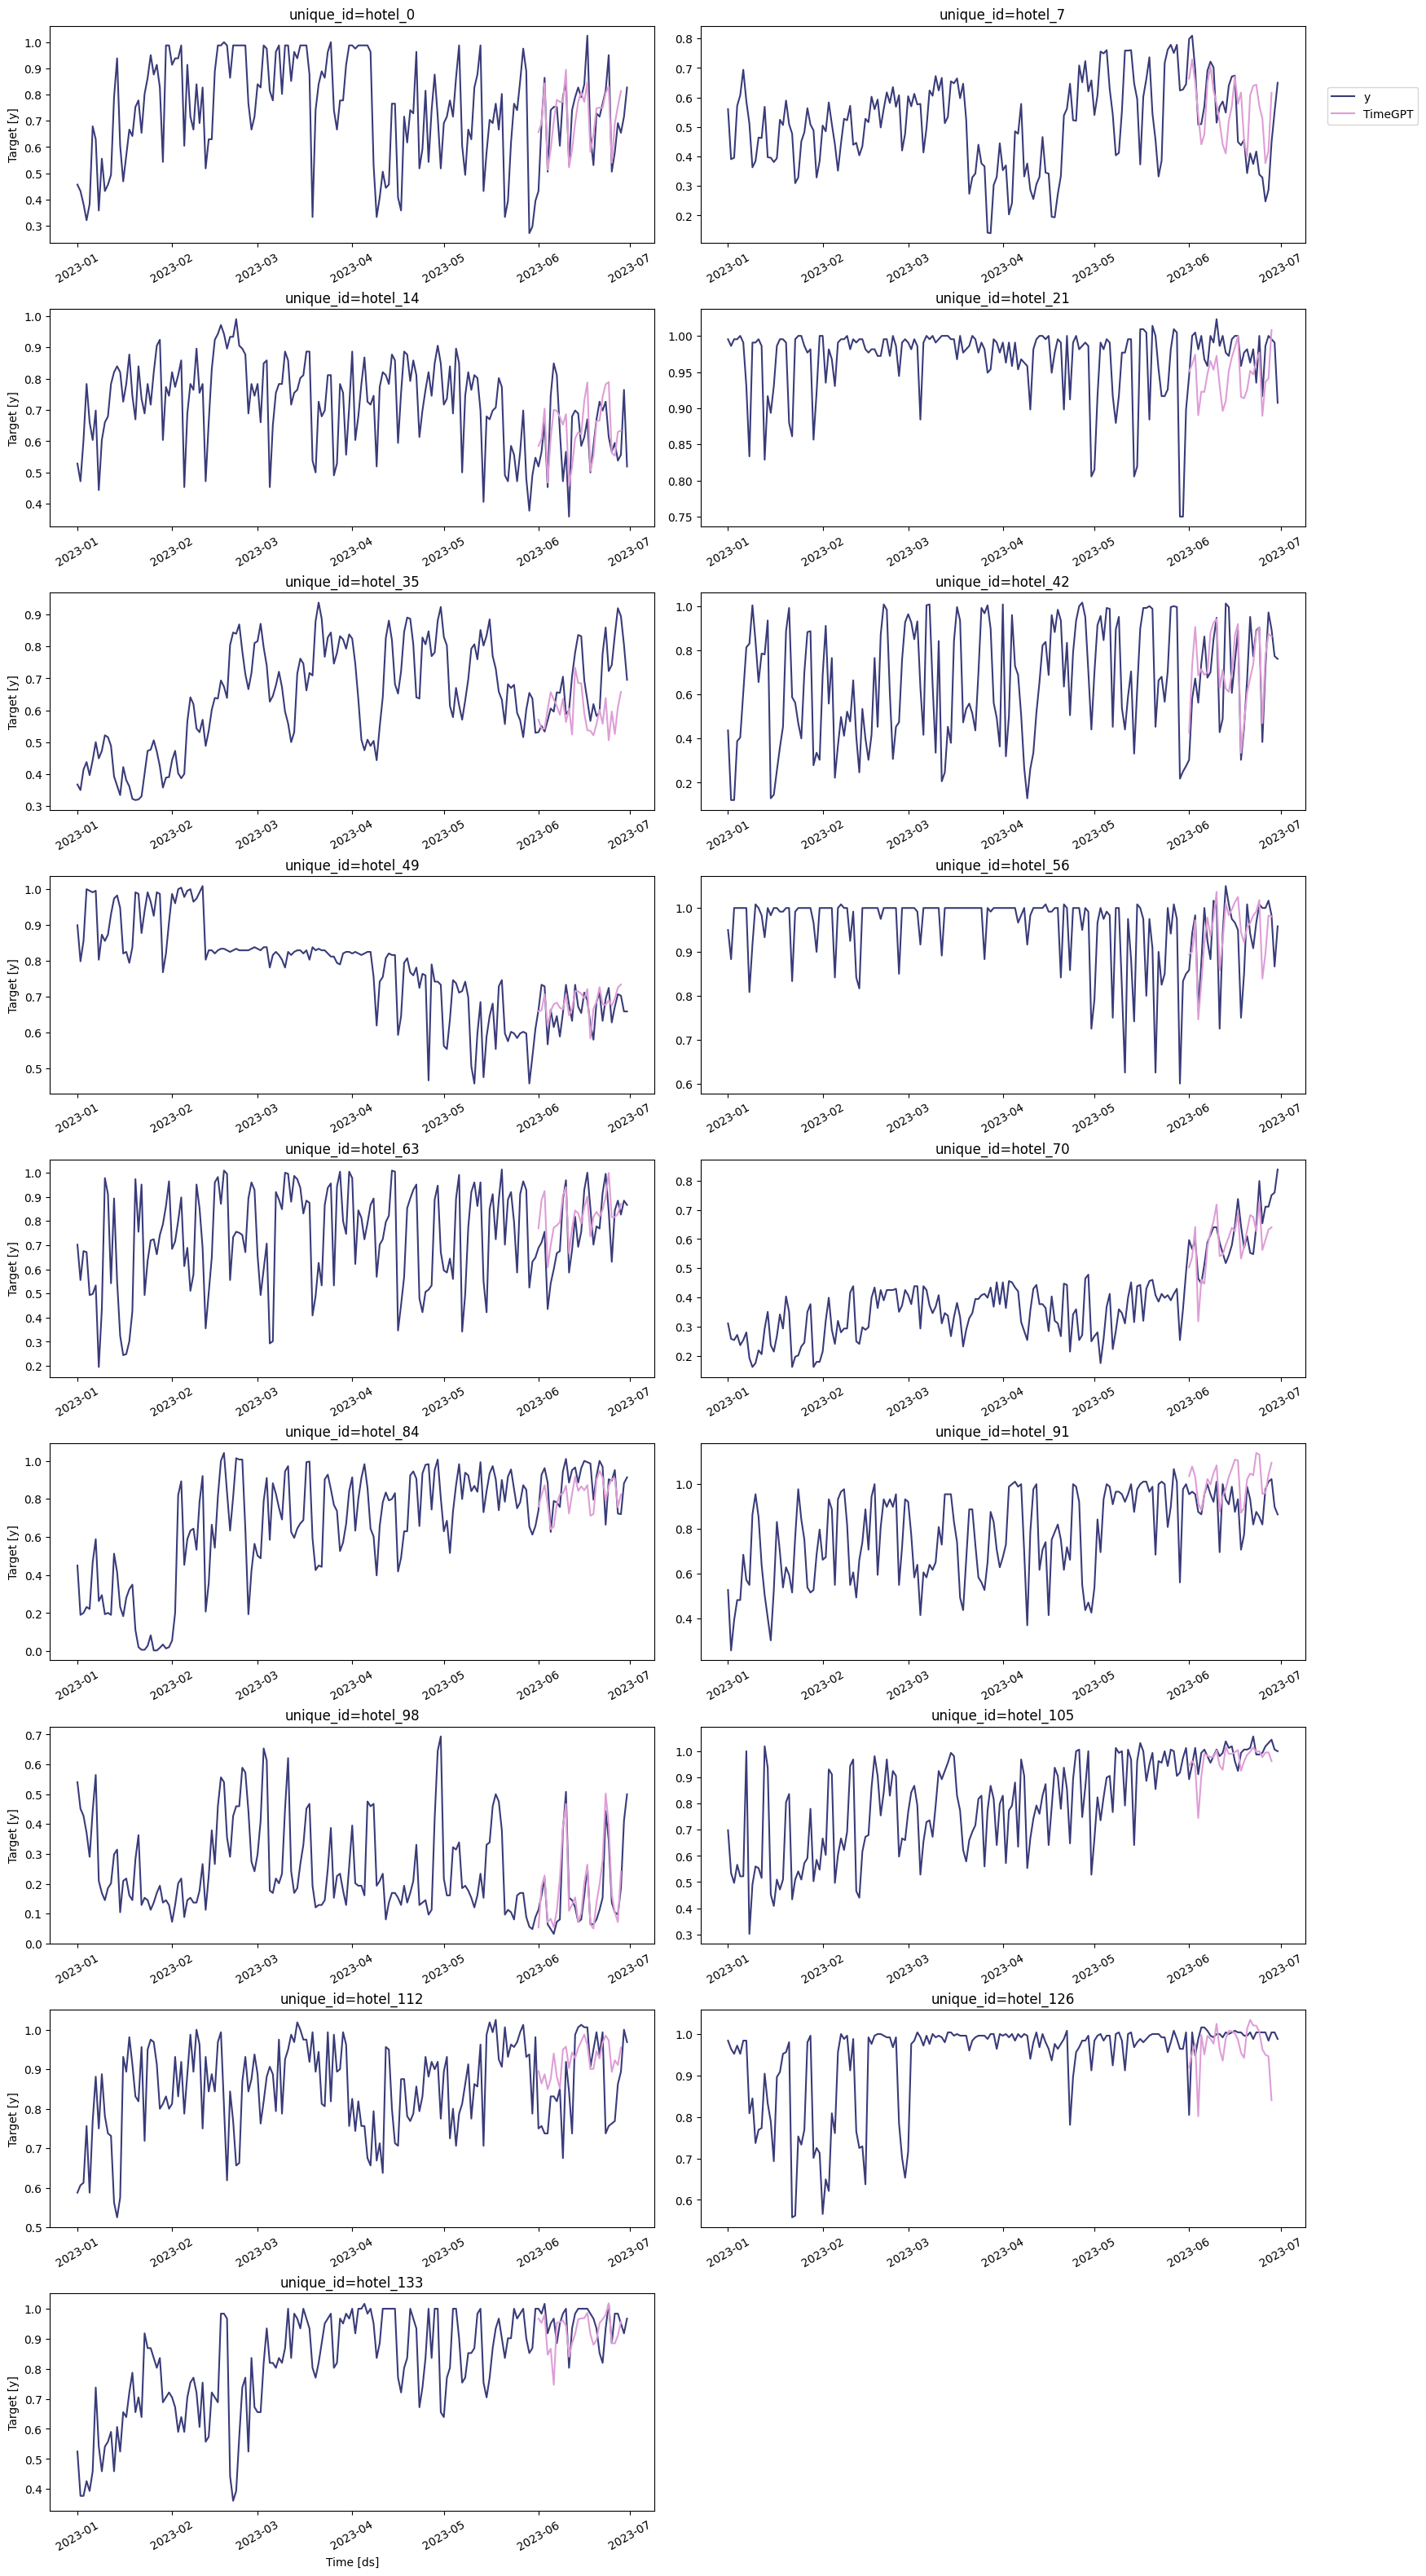

In [ ]:
nixtla_client.plot(
    df = df.query("ds >= '2023-01-01'"),
    forecasts_df = forecast_timegpt,
    max_ids=17
)

## Forecasting Best Model

In [ ]:
best_models_timegpt = (
    forecast_timegpt
    .query("unique_id == 'hotel_112' or unique_id == 'hotel_21' or unique_id == 'hotel_35' or unique_id == 'hotel_7' or unique_id == 'hotel_98' or unique_id == 'hotel_84'")
    .assign(best_model = 'TimeGPT')
)

best_models_timegpt

unique_id         ds   TimeGPT best_model
56   hotel_112 2023-06-01  0.895308    TimeGPT
57   hotel_112 2023-06-02  0.863811    TimeGPT
58   hotel_112 2023-06-03  0.887088    TimeGPT
59   hotel_112 2023-06-04  0.849535    TimeGPT
60   hotel_112 2023-06-05  0.874775    TimeGPT
..         ...        ...       ...        ...
471   hotel_98 2023-06-24  0.396450    TimeGPT
472   hotel_98 2023-06-25  0.164832    TimeGPT
473   hotel_98 2023-06-26  0.104079    TimeGPT
474   hotel_98 2023-06-27  0.071306    TimeGPT
475   hotel_98 2023-06-28  0.241548    TimeGPT

[168 rows x 4 columns]

In [ ]:
mlf.fit(df=df.query("ds < '2023-06-01'"), static_features = [])
forecast_ml = mlf.predict(h=28, X_df= test_df.drop(columns=['y']))
display(forecast_ml)

best_models_ml = (
    forecast_ml
    .query("unique_id == 'hotel_0' or unique_id == 'hotel_133' or unique_id == 'hotel_42' or unique_id == 'hotel_91' or unique_id == 'hotel_63'")
    .assign(best_model = 'XGBoost')
)

best_models_ml


unique_id         ds       xgb
0     hotel_0 2023-06-01  0.748458
1     hotel_0 2023-06-02  0.735681
2     hotel_0 2023-06-03  0.874705
3     hotel_0 2023-06-04  0.582574
4     hotel_0 2023-06-05  0.723719
..        ...        ...       ...
471  hotel_98 2023-06-24  0.497470
472  hotel_98 2023-06-25  0.157509
473  hotel_98 2023-06-26  0.121309
474  hotel_98 2023-06-27  0.101178
475  hotel_98 2023-06-28  0.211877

[476 rows x 3 columns]

unique_id         ds       xgb best_model
0     hotel_0 2023-06-01  0.748458    XGBoost
1     hotel_0 2023-06-02  0.735681    XGBoost
2     hotel_0 2023-06-03  0.874705    XGBoost
3     hotel_0 2023-06-04  0.582574    XGBoost
4     hotel_0 2023-06-05  0.723719    XGBoost
..        ...        ...       ...        ...
443  hotel_91 2023-06-24  0.954686    XGBoost
444  hotel_91 2023-06-25  0.828883    XGBoost
445  hotel_91 2023-06-26  0.865747    XGBoost
446  hotel_91 2023-06-27  0.885520    XGBoost
447  hotel_91 2023-06-28  0.938158    XGBoost

[140 rows x 4 columns]

In [ ]:
sf_arima_pred.fit(df=df.query("ds < '2023-06-01'"))
forecast_arima = sf_arima_pred.predict(h=28, X_df= test_df.drop(columns=['y']))
display(forecast_arima)
forecast_arima.to_csv('forecast_arima.csv', index=False)
best_models_arima = (
    forecast_arima
    .query("unique_id == 'hotel_105' or unique_id == 'hotel_14' or unique_id == 'hotel_70'")
    .assign(best_model = 'AutoARIMA')
)

best_models_arima

unique_id         ds  AutoARIMA
0     hotel_0 2023-06-01   0.585958
1     hotel_0 2023-06-02   0.736373
2     hotel_0 2023-06-03   0.850287
3     hotel_0 2023-06-04   0.659252
4     hotel_0 2023-06-05   0.693495
..        ...        ...        ...
471  hotel_98 2023-06-24   0.356322
472  hotel_98 2023-06-25   0.190901
473  hotel_98 2023-06-26   0.088446
474  hotel_98 2023-06-27   0.069883
475  hotel_98 2023-06-28   0.108056

[476 rows x 3 columns]

unique_id         ds  AutoARIMA best_model
28   hotel_105 2023-06-01   0.837925  AutoARIMA
29   hotel_105 2023-06-02   0.961816  AutoARIMA
30   hotel_105 2023-06-03   0.935273  AutoARIMA
31   hotel_105 2023-06-04   0.741017  AutoARIMA
32   hotel_105 2023-06-05   0.811506  AutoARIMA
..         ...        ...        ...        ...
387   hotel_70 2023-06-24   0.754979  AutoARIMA
388   hotel_70 2023-06-25   0.599195  AutoARIMA
389   hotel_70 2023-06-26   0.573717  AutoARIMA
390   hotel_70 2023-06-27   0.595025  AutoARIMA
391   hotel_70 2023-06-28   0.600396  AutoARIMA

[84 rows x 4 columns]

In [ ]:
sf_base.fit(df=df.query("ds < '2023-06-01'"))
forecast_baseline= sf_base.predict(h=28)
forecast_ETS = (
    forecast_baseline
    [['unique_id','ds','AutoETS']]
)

best_models_ETS = (
    forecast_ETS
    .query("unique_id == 'hotel_126'")
    .assign(best_model = 'AutoETS')
)

forecast_seasonalNaive = (
    forecast_baseline
    [['unique_id','ds','SeasonalNaive']]
)

best_models_seasonalNaive = (
    forecast_seasonalNaive
    .query("unique_id == 'hotel_56'")
    .assign(best_model = 'SeasonalNaive')
)

best_models_seasonalNaive

In [ ]:
nf.fit(df=df.query("ds < '2023-06-01' and unique_id == 'hotel_49'"))
forecast_nf = nf.predict()

display(forecast_nf)
forecast_nf.to_csv('forecast_nf.csv', index=False)
best_models_nf = (
    forecast_nf
    [['unique_id','ds','AutoNBEATS']]
    .assign(best_model = 'AutoNBEATS')
)

best_models_nf

In [ ]:
concat_df = pd.concat([best_models_timegpt, best_models_ml, best_models_arima, best_models_ETS, best_models_seasonalNaive, best_models_nf], axis=0)
display(concat_df)
concat_df.to_csv('final_best_models_rating.csv', index=False)

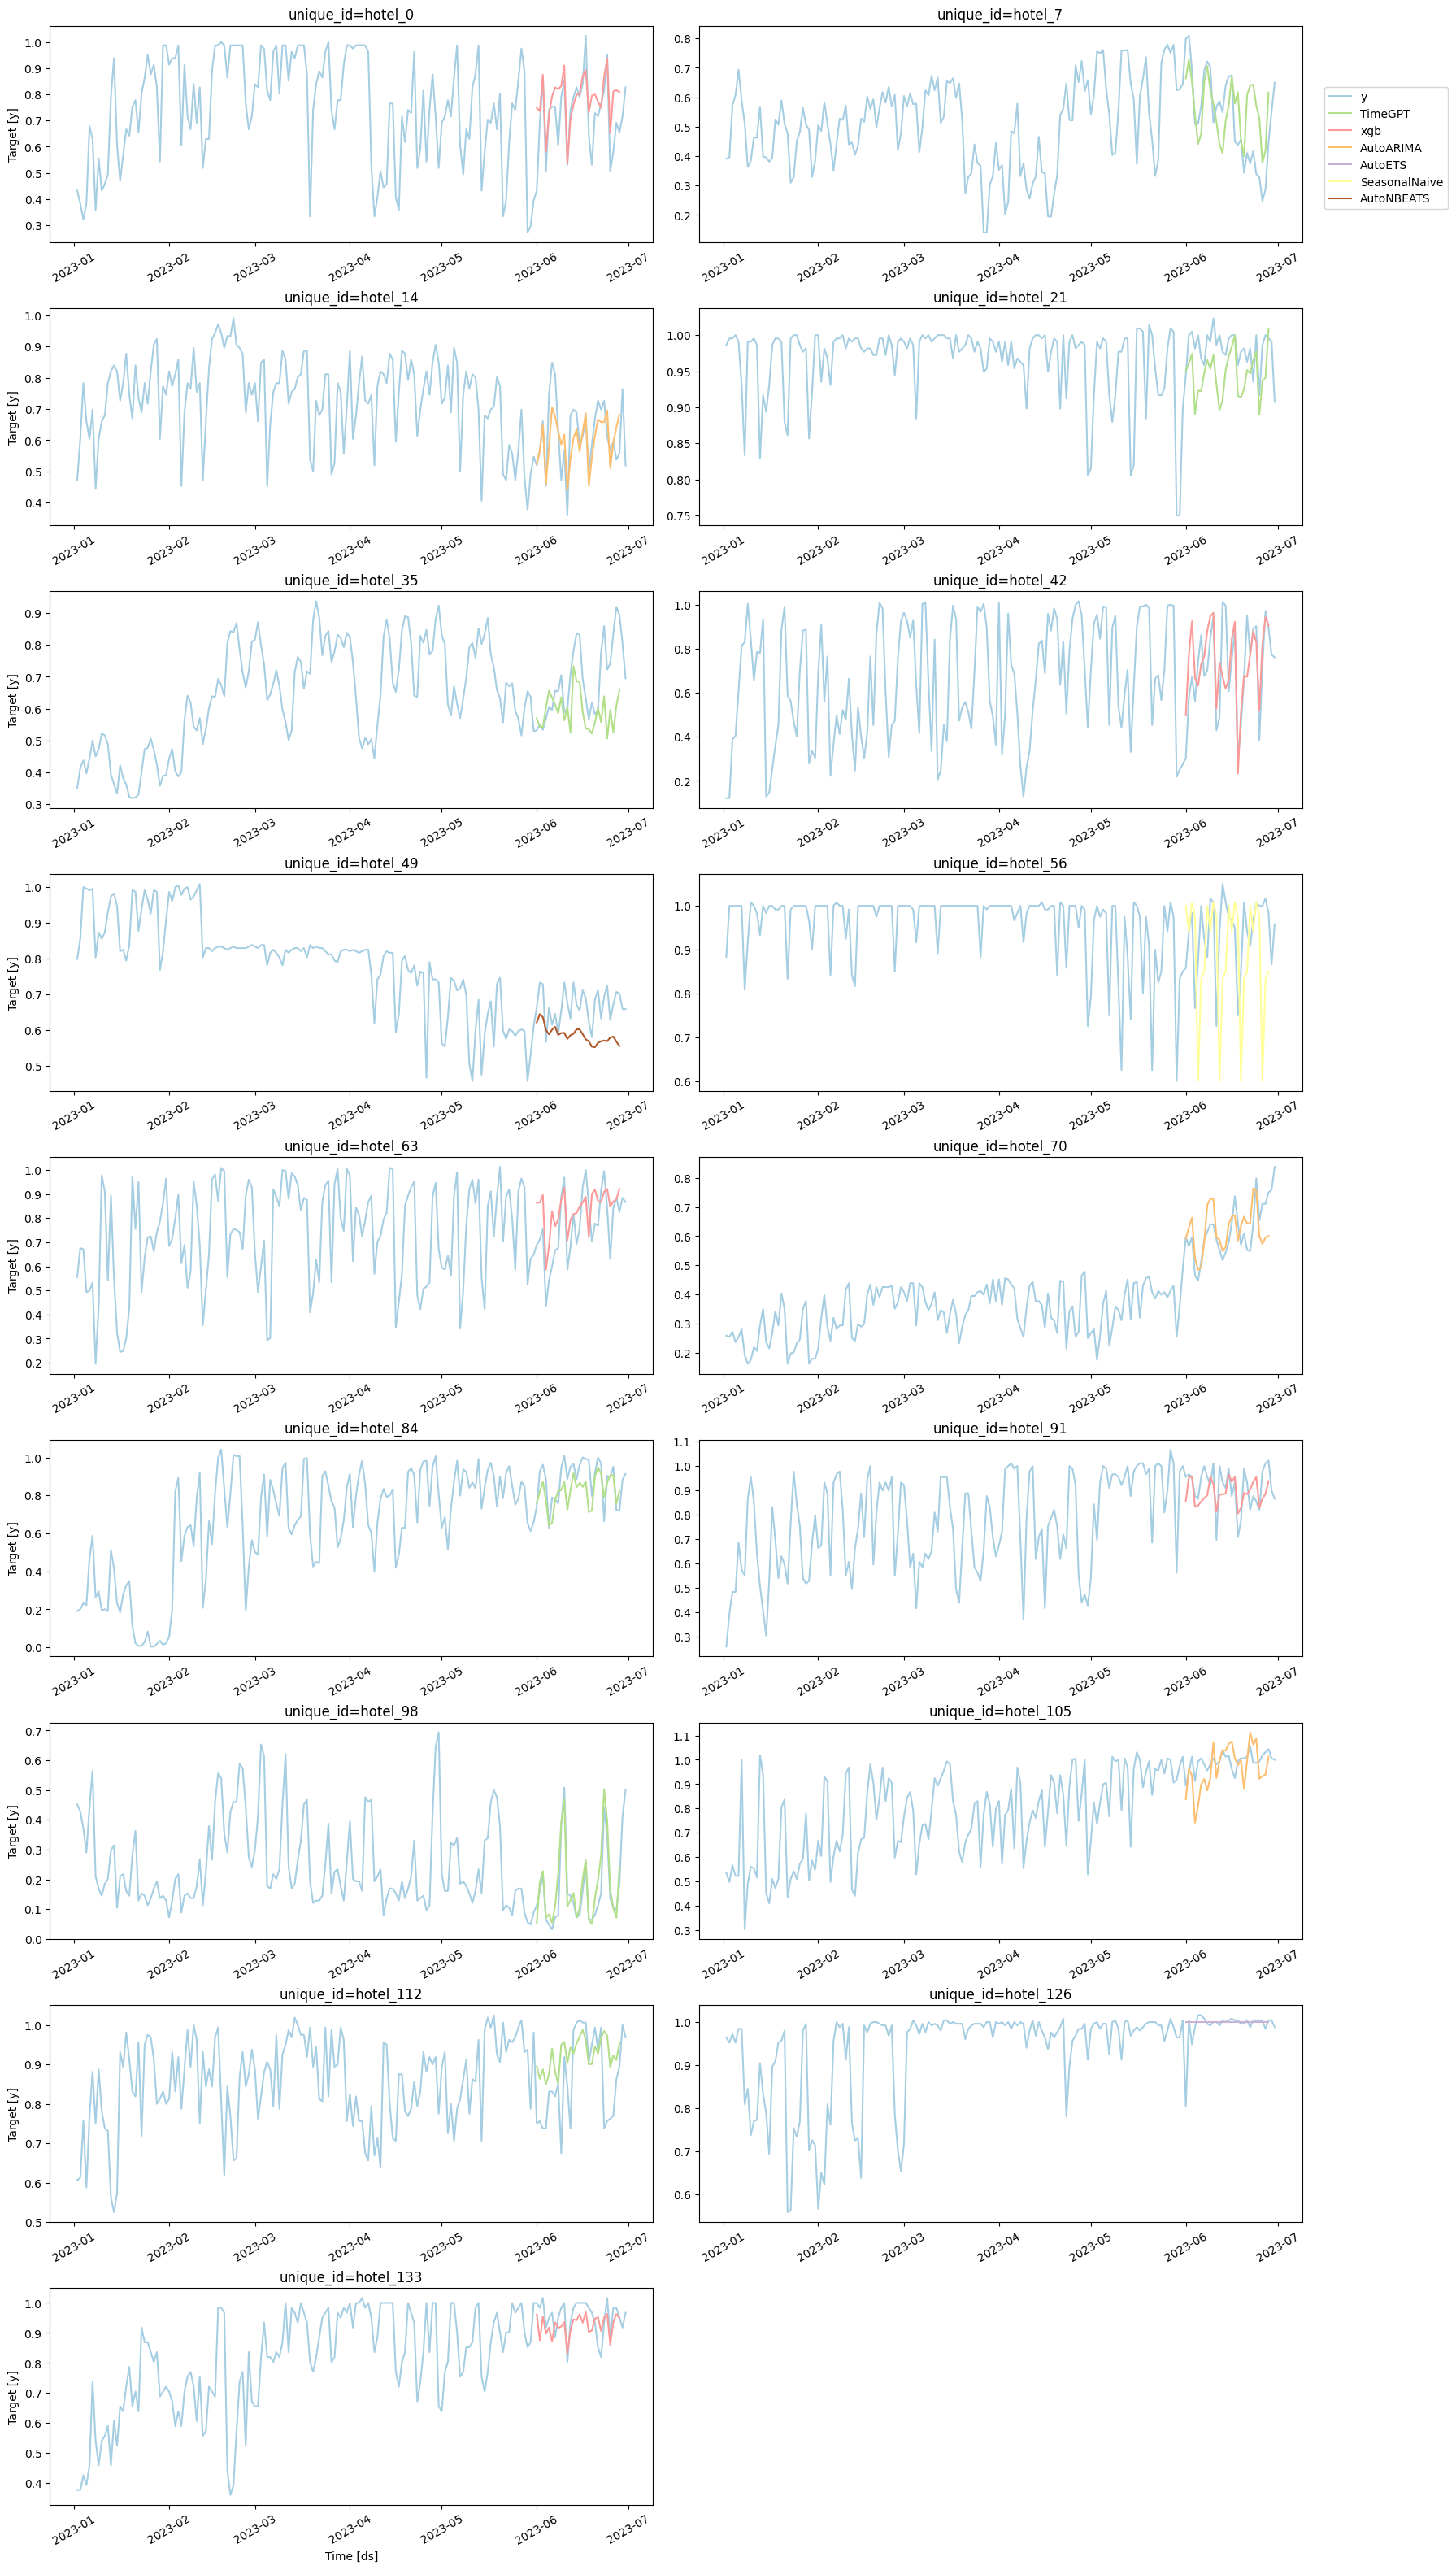

In [ ]:
plot_series(
    df=df.query("ds > '2023-01-01'"),
    forecasts_df=concat_df,
    max_ids=17,
    palette='Paired',
    models=['TimeGPT', 'xgb', 'AutoARIMA', 'AutoETS', 'SeasonalNaive', 'AutoNBEATS']
)